In [14]:
from surprise import Dataset
from surprise import Reader
from surprise import model_selection
from surprise.model_selection import cross_validate
#from surprise import evaluate, print_perf
#from surprise import print_perf
from surprise import SVD
from surprise import NMF
from surprise import KNNBasic
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random
set_seed = 0
random.seed(set_seed)
np.random.seed(set_seed)
import os
#load data from a file:Ques 3
file_path = os.path.expanduser('C:/Users/User/Documents/MachineLearning/MachineLearning/h7/restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)

In [15]:
#class surprise.model_selection.split.KFold(n_splits=3, random_state=None, shuffle=True)
algo = SVD()
perf_svd = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
#print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9480  0.9392  0.9518  0.9463  0.0053  
MAE (testset)     0.7480  0.7420  0.7510  0.7470  0.0037  
Fit time          35.26   35.02   33.45   34.58   0.80    
Test time         3.12    2.40    2.40    2.64    0.34    


In [16]:
#data.split(n_folds=3)
algo = SVD(biased=False) #PMF
perf_pmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
#print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9599  0.9747  0.9643  0.9663  0.0062  
MAE (testset)     0.7569  0.7675  0.7632  0.7626  0.0044  
Fit time          35.90   36.10   41.36   37.78   2.53    
Test time         1.93    2.54    2.52    2.33    0.28    


In [17]:
#NMF
algo = NMF()
perf_nmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9729  0.9756  0.9725  0.9737  0.0014  
MAE (testset)     0.7649  0.7657  0.7631  0.7646  0.0011  
Fit time          30.68   30.79   32.27   31.25   0.72    
Test time         2.42    2.10    2.70    2.41    0.24    


In [18]:
algo = KNNBasic(sim_options = {'user_based': True})
perf_ub = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9862  0.9936  0.9883  0.9894  0.0031  
MAE (testset)     0.7785  0.7859  0.7817  0.7821  0.0030  
Fit time          2.64    2.72    2.45    2.60    0.11    
Test time         38.89   38.67   36.66   38.07   1.01    


In [19]:
algo = KNNBasic(sim_options = {'user_based': False})
perf_ib = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9863  0.9891  0.9814  0.9856  0.0032  
MAE (testset)     0.7835  0.7804  0.7790  0.7810  0.0018  
Fit time          3.22    3.21    3.26    3.23    0.02    
Test time         40.05   41.29   40.77   40.70   0.51    


In [20]:
print(perf_svd)
print(perf_pmf)
print(perf_nmf)
print(perf_ub)
print(perf_ib)

{'test_rmse': array([0.94796684, 0.9391688 , 0.95181025]), 'test_mae': array([0.74797143, 0.74204123, 0.75101422]), 'fit_time': (35.26401686668396, 35.02345108985901, 33.45391368865967), 'test_time': (3.115178108215332, 2.399137258529663, 2.398137092590332)}
{'test_rmse': array([0.95994095, 0.97474672, 0.96426273]), 'test_mae': array([0.75692928, 0.76753833, 0.76318911]), 'fit_time': (35.89583349227905, 36.09606456756592, 41.36215853691101), 'test_time': (1.9281103610992432, 2.536144971847534, 2.515144109725952)}
{'test_rmse': array([0.97294788, 0.97556265, 0.97246326]), 'test_mae': array([0.76494471, 0.76572785, 0.76311799]), 'fit_time': (30.677323579788208, 30.79233455657959, 32.268616914749146), 'test_time': (2.417332172393799, 2.1041202545166016, 2.6951541900634766)}
{'test_rmse': array([0.98619083, 0.99360668, 0.98828903]), 'test_mae': array([0.7785007 , 0.7859222 , 0.78174296]), 'fit_time': (2.63615083694458, 2.7181556224823, 2.4491403102874756), 'test_time': (38.89031004905701, 

In [21]:
#df = pd.DataFrame(bld, columns =['test_rmse', 'test_mae'])

In [22]:
#14
algo = KNNBasic(sim_options = {
'name':'MSD',
'user_based': True
})
perf_msd = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf_msd)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9935  0.9889  0.9845  0.9890  0.0037  
MAE (testset)     0.7850  0.7828  0.7765  0.7814  0.0036  
Fit time          2.35    2.40    2.40    2.38    0.02    
Test time         35.25   36.56   36.21   36.01   0.55    
{'test_rmse': array([0.99352408, 0.98886666, 0.98446508]), 'test_mae': array([0.78499893, 0.78282046, 0.7764942 ]), 'fit_time': (2.349134683609009, 2.3976845741271973, 2.402137279510498), 'test_time': (35.2539427280426, 36.55740547180176, 36.20883393287659)}


In [23]:
perf_msd

{'test_rmse': array([0.99352408, 0.98886666, 0.98446508]),
 'test_mae': array([0.78499893, 0.78282046, 0.7764942 ]),
 'fit_time': (2.349134683609009, 2.3976845741271973, 2.402137279510498),
 'test_time': (35.2539427280426, 36.55740547180176, 36.20883393287659)}

In [24]:
algo = KNNBasic(sim_options = {
'name':'cosine',
'user_based': True
})
perf_cosine = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf_cosine)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0271  1.0210  1.0159  1.0213  0.0046  
MAE (testset)     0.8148  0.8082  0.8032  0.8087  0.0048  
Fit time          10.26   10.21   10.25   10.24   0.02    
Test time         35.95   36.07   36.33   36.12   0.16    
{'test_rmse': array([1.02714849, 1.02096491, 1.01592597]), 'test_mae': array([0.81483036, 0.8082239 , 0.80316082]), 'fit_time': (10.25758695602417, 10.210584163665771, 10.253586292266846), 'test_time': (35.94705581665039, 36.07402443885803, 36.332043409347534)}


In [25]:
algo = KNNBasic(sim_options = {
'name':'pearson',
'user_based': True
})
perf_pearson = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf_pearson)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0211  1.0242  1.0183  1.0212  0.0024  
MAE (testset)     0.8092  0.8131  0.8102  0.8109  0.0016  
Fit time          13.54   13.50   13.97   13.67   0.21    
Test time         35.32   36.23   35.94   35.83   0.38    
{'test_rmse': array([1.02114209, 1.02418061, 1.01831981]), 'test_mae': array([0.80924886, 0.8131111 , 0.81021121]), 'fit_time': (13.536774158477783, 13.501526594161987, 13.972799301147461), 'test_time': (35.323020219802856, 36.231072187423706, 35.936055183410645)}


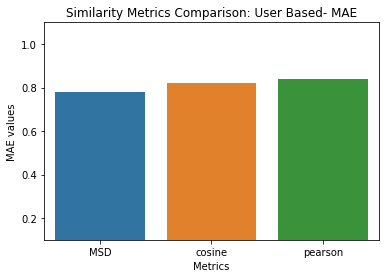

[0.780429913455623, 0.8225973212630643, 0.8388659263308694]


In [45]:
vals = [np.mean(perf_msd['test_mae']), np.mean(perf_cosine['test_mae']), np.mean(perf_pearson['test_mae'])]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: User Based- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.1, 1.1)
plt.show()
print(vals)

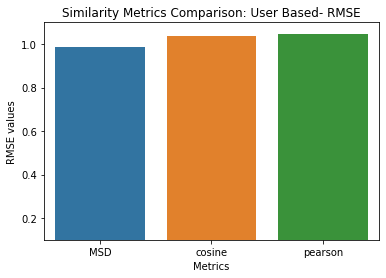

[0.985553416674191, 1.0364208393125727, 1.048605839375262]


In [44]:
vals = [np.mean(perf_msd['test_rmse']), np.mean(perf_cosine['test_rmse']), np.mean(perf_pearson['test_rmse'])]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='RMSE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: User Based- RMSE")
ax.set_ylabel('RMSE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.1,1.1)
plt.show()
print(vals)

In [28]:
#item_based
algo = KNNBasic(sim_options = {
'name':'MSD',
'user_based': False
})
perf_msd = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf_msd)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9835  0.9920  0.9812  0.9856  0.0047  
MAE (testset)     0.7780  0.7838  0.7795  0.7804  0.0024  
Fit time          3.23    3.26    3.62    3.37    0.18    
Test time         40.25   41.66   44.74   42.22   1.87    
{'test_rmse': array([0.98346455, 0.99202787, 0.98116783]), 'test_mae': array([0.7780393 , 0.78377928, 0.77947116]), 'fit_time': (3.227184534072876, 3.2641868591308594, 3.6172068119049072), 'test_time': (40.253302574157715, 41.66138291358948, 44.741610527038574)}


In [29]:
algo = KNNBasic(sim_options = {
'name':'cosine',
'user_based': False
})
perf_cosine = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf_cosine)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0375  1.0331  1.0387  1.0364  0.0024  
MAE (testset)     0.8254  0.8176  0.8247  0.8226  0.0035  
Fit time          15.82   15.75   15.54   15.71   0.12    
Test time         40.56   40.42   41.16   40.71   0.32    
{'test_rmse': array([1.03752386, 1.03305071, 1.03868795]), 'test_mae': array([0.825412  , 0.81764083, 0.82473913]), 'fit_time': (15.817904710769653, 15.75490117073059, 15.543655395507812), 'test_time': (40.56231999397278, 40.41725945472717, 41.16223335266113)}


In [30]:
algo = KNNBasic(sim_options = {
'name':'pearson',
'user_based': False
})
perf_pearson = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf_pearson)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0513  1.0471  1.0475  1.0486  0.0019  
MAE (testset)     0.8402  0.8380  0.8385  0.8389  0.0010  
Fit time          22.82   22.40   22.32   22.51   0.22    
Test time         41.23   42.47   44.06   42.58   1.16    
{'test_rmse': array([1.05127249, 1.04707897, 1.04746606]), 'test_mae': array([0.84019015, 0.83795045, 0.83845718]), 'fit_time': (22.819024801254272, 22.399962186813354, 22.317203044891357), 'test_time': (41.22535800933838, 42.466023445129395, 44.05952000617981)}


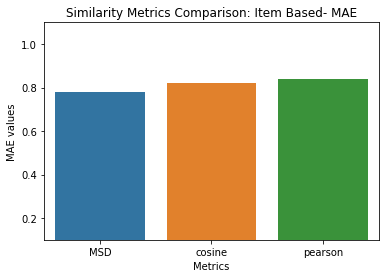

[0.780429913455623, 0.8225973212630643, 0.8388659263308694]


In [46]:
vals = [np.mean(perf_msd['test_mae']), np.mean(perf_cosine['test_mae']), np.mean(perf_pearson['test_mae'])]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.1, 1.1)
plt.show()
print(vals)

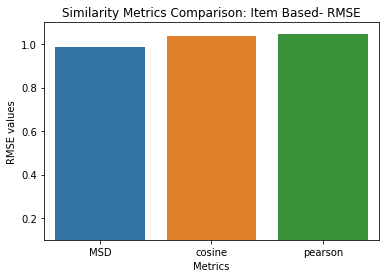

[0.985553416674191, 1.0364208393125727, 1.048605839375262]


In [47]:
vals = [np.mean(perf_msd['test_rmse']), np.mean(perf_cosine['test_rmse']), np.mean(perf_pearson['test_rmse'])]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='RMSE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- RMSE")
ax.set_ylabel('RMSE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.1,1.1)
plt.show()
print(vals)

In [34]:
#TEST

best = []
name=''
k=(1,6,12,18,24)
for kvalue in k:

    for algo in [(KNNBasic(k=kvalue, sim_options = {'name':'MSD', 'user_based': True }))]:
    
       
  
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
        temp = pd.DataFrame.from_dict(results).mean(axis=0)
        
        best.append(temp)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [35]:
temp

test_rmse     0.986041
fit_time      2.420858
test_time    32.545266
dtype: float64

In [36]:
#best

df = pd.DataFrame(best, columns =['test_rmse', 'fit_time', 'test_time']).sort_values('test_rmse')
  
# print the data 
df 



,test_rmse,fit_time,test_time
4,0.986041,2.420858,32.545266
3,0.988602,2.427530,28.051141
2,0.993832,2.406138,25.496708
1,1.022580,2.612149,23.929808
0,1.321573,2.462141,18.276620


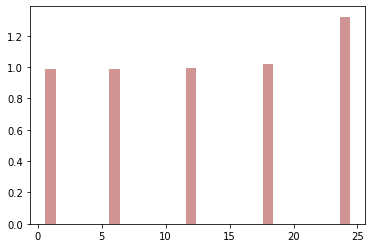

In [37]:
plt.bar(k,df.test_rmse,color='brown',align='center', alpha=0.5)
plt.show()

In [38]:
best1 = []
name=''
k=(1,6,12,18,24)
for kvalue in k:

    for algo in [(KNNBasic(k=kvalue, sim_options = {'name':'MSD', 'user_based': False }))]:
    
       
  
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
   
        temp = pd.DataFrame.from_dict(results).mean(axis=0)
        
        best1.append(temp)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [39]:
#best

df1 = pd.DataFrame(best1, columns =['test_rmse', 'fit_time', 'test_time']).sort_values('test_rmse')
  
# print the data 
df1 

,test_rmse,fit_time,test_time
4,0.989407,3.395701,37.697374
3,0.997710,3.272520,32.501459
2,1.014088,3.298821,29.040152
1,1.063692,3.345525,25.768663
0,1.437448,3.452197,21.301050


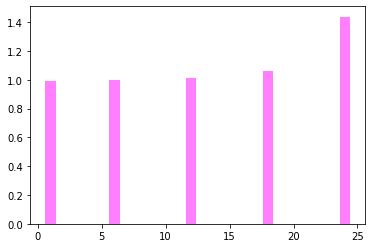

In [40]:
plt.bar(k,df1.test_rmse,color='magenta',align='center', alpha=0.5)
plt.show()